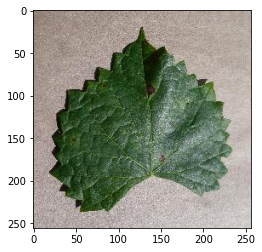

In [47]:
import os
import numpy as np
import cv2 # OpenCV biblioteka
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
# iscrtavanje slika i grafika unutar samog browsera
%matplotlib inline 
# prikaz vecih slika 
# matplotlib.rcParams['figure.figsize'] = 16,12
img = cv2.imread('/content/image (12).JPG') # ucitavanje slike sa diska
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # konvertovanje iz BGR u RGB model boja (OpenCV ucita sliku kao BGR)
plt.imshow(img)  # prikazivanje slike
original = img.copy()

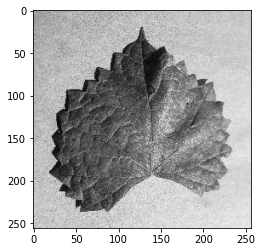

In [48]:
gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
plt.imshow(gs,cmap='Greys_r')

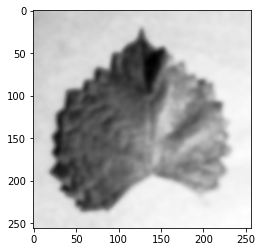

In [49]:
blur = cv2.GaussianBlur(gs, (15,15),0)
plt.imshow(blur,cmap='Greys_r')

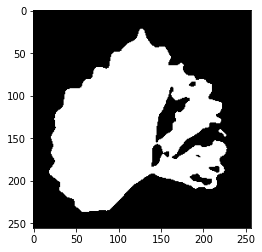

In [50]:
ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(im_bw_otsu,cmap='Greys_r')

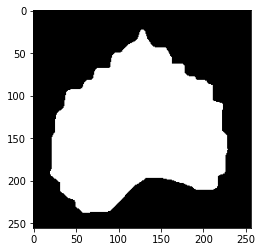

In [51]:
kernel = np.ones((20,20),np.uint8)
closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
plt.imshow(closing,cmap='Greys_r')

In [52]:
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
len(contours)

1

In [53]:
cnt = contours[0]
len(cnt)

220

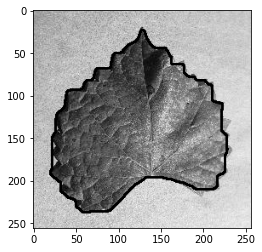

In [54]:
plottedContour = cv2.drawContours(gs,contours,-1,(0,255,0),2)
plt.imshow(plottedContour,cmap="Greys_r")

In [55]:
n = img.shape[0]
m = img.shape[1]
n,m

(256, 256)

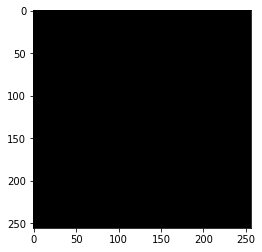

In [56]:
#Creating mask image for background subtraction using leaf contour

black_img = np.empty([n,m,3],dtype=np.uint8)
black_img.fill(0)
plt.imshow(black_img,cmap="Greys_r")

In [57]:
#Finding the correct leaf contour from the list of contours
def find_contour(cnts):
    contains = []
    y_ri,x_ri = n,m
    for cc in cnts:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    print(contains)
    return val[0]

[1.0]


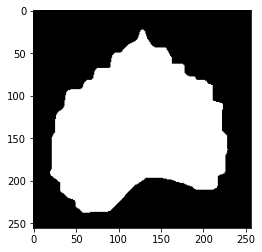

In [58]:
index = find_contour(contours)
cnt = contours[index]
mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
plt.imshow(mask)

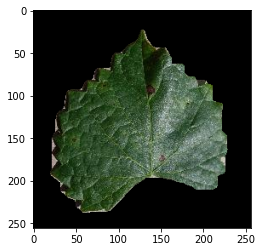

In [59]:
#Performing masking operation on the original image
maskedImg = cv2.bitwise_and(img, mask)
plt.imshow(maskedImg)

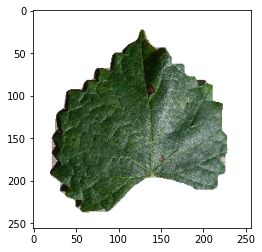

In [60]:
white_pix = [255,255,255]
black_pix = [0,0,0]

final_img = maskedImg
h,w,channels = final_img.shape
for x in range(0,w):
    for y in range(0,h):
        channels_xy = final_img[y,x]
        if all(channels_xy == black_pix):    
            final_img[y,x] = white_pix

plt.imshow(final_img)